<a href="https://colab.research.google.com/github/Jacklinekiarie/Tomatoes-disease-detection/blob/main/Model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot  as plt
from matplotlib.pyplot import*

Mount model to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Image size(200,200) and batch size is 32 . Initialize the images

In [ ]:
img_height, img_width=[200,200]
batch_size= 32
train_ds =tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Tomatoez/train',
    image_size =(img_height,img_width),
    batch_size=batch_size
    
)
test_ds =tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Tomatoez/test',
    image_size =(img_height,img_width),
    batch_size=batch_size
    
)

val_ds =tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Tomatoez/validation',
    image_size =(img_height,img_width),
    batch_size=batch_size
    
)


Found 16666 files belonging to 10 classes.
Found 4585 files belonging to 10 classes.
Found 330 files belonging to 10 classes.


Visualize the images used.

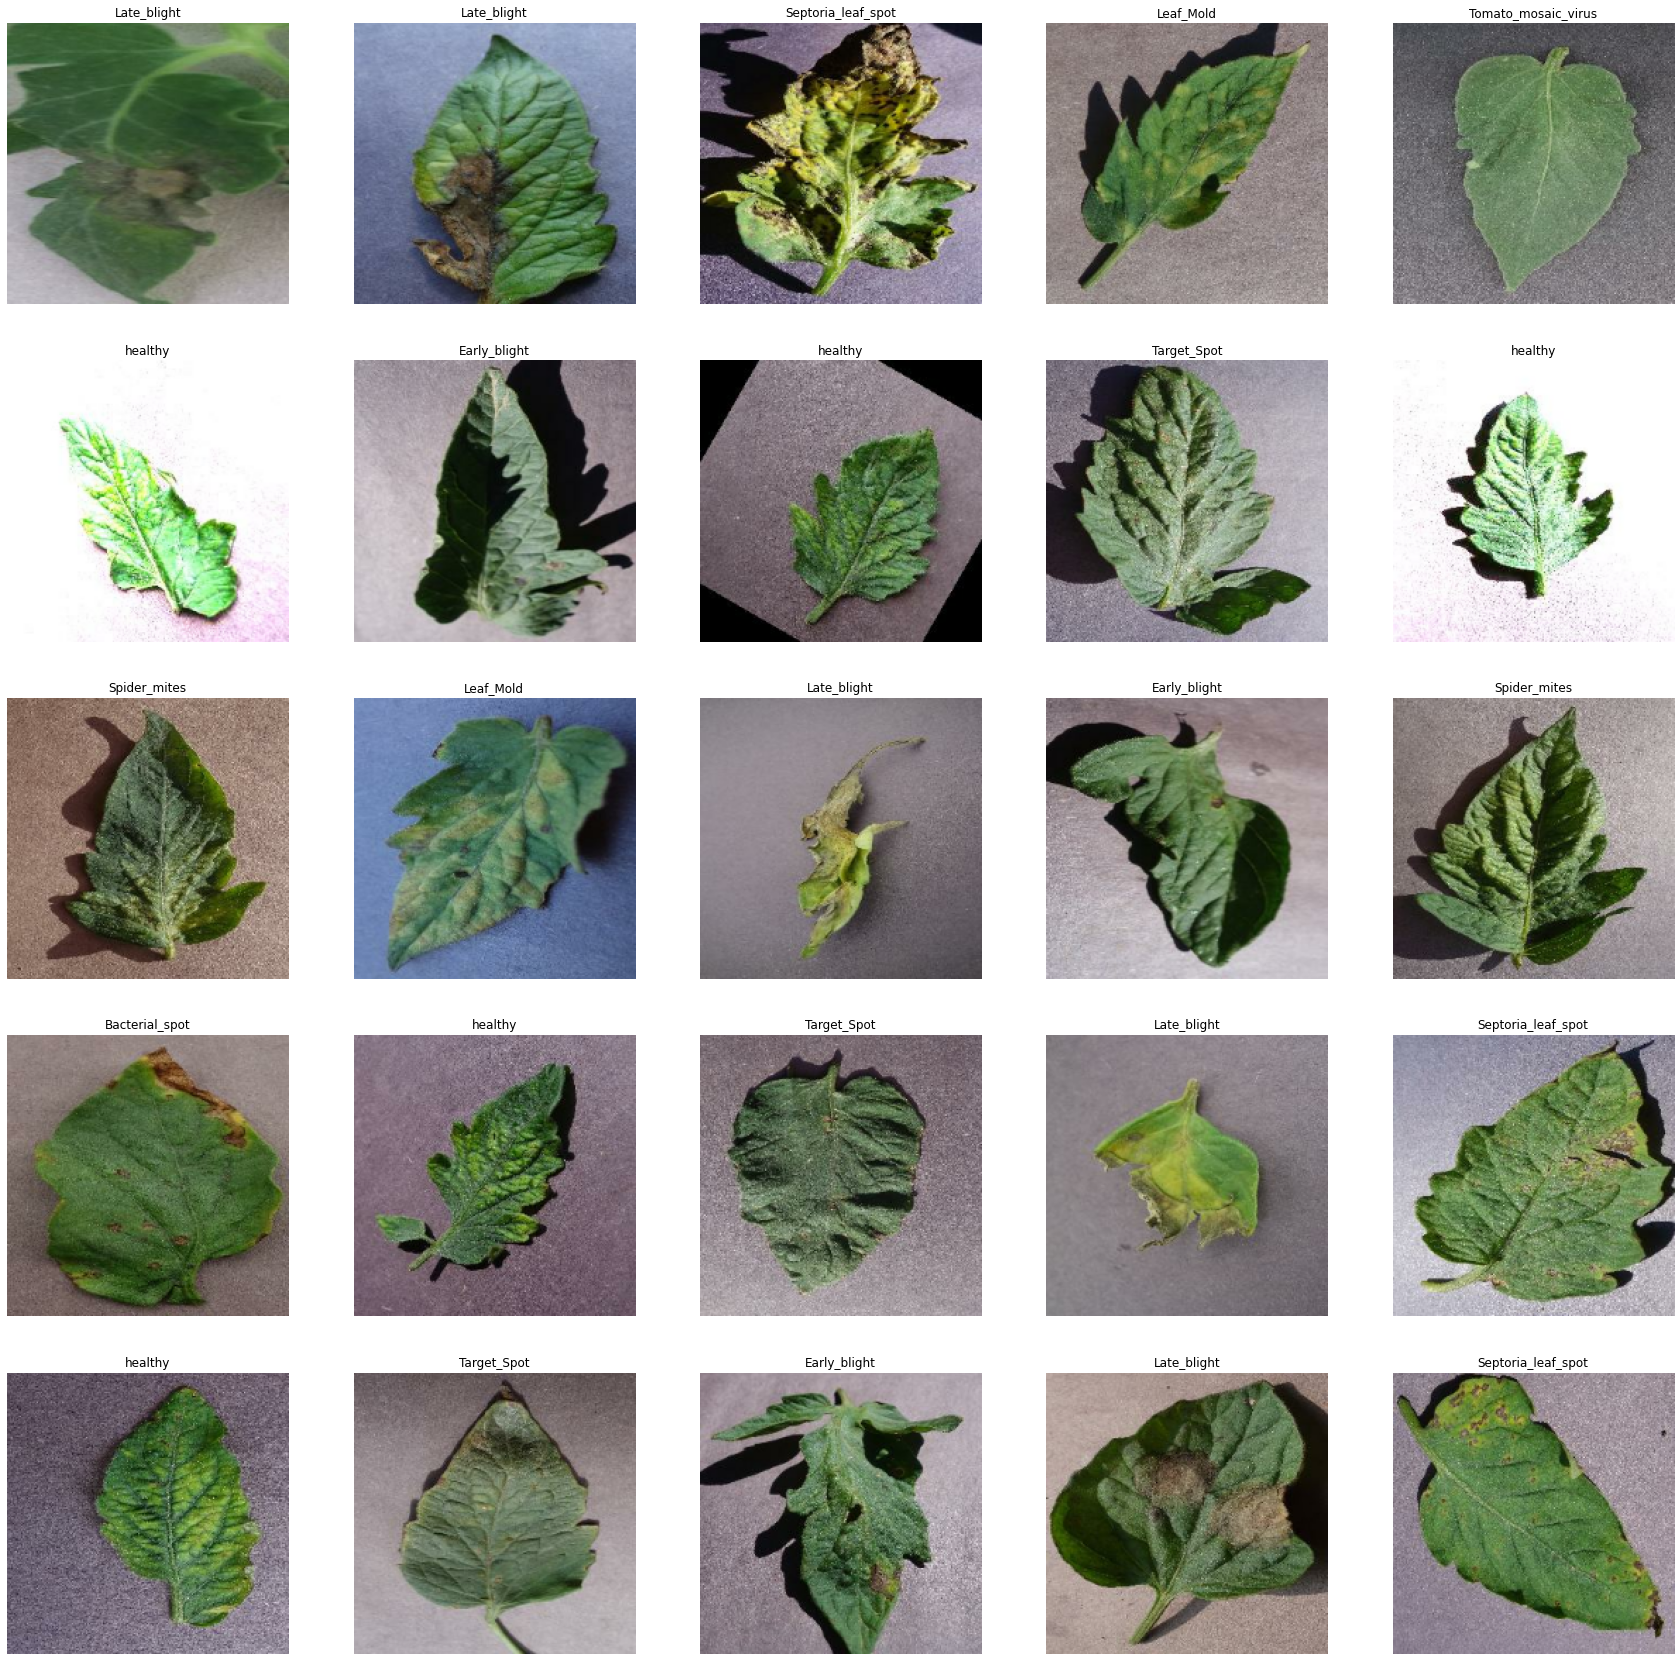

In [ ]:
class_names=["Bacterial_spot",
"Early_blight",
"Late_blight",
"Leaf_Mold",
"Septoria_leaf_spot",
"Spider_mites",
"Target_Spot",
"Yellow_Leaf_Curl_Virus",
"Tomato_mosaic_virus",
"healthy"]


plt.figure(figsize=(30,30)) 

for images, labels in train_ds.take(1):
  
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")



In [ ]:
import keras
from tensorflow.keras import utils as np_utils
from tensorflow.keras import datasets ,layers ,models
from tensorflow.keras import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dense
from keras.layers import Dropout
from keras.layers import Flatten
model = Sequential([
            
    Conv2D(filters=32,kernel_size=(3,3),  input_shape = (200, 200, 3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(filters=64,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 48, 48, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        1

In [ ]:
model.compile(
    optimizer="adam",
    loss= tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
epochs = 10
history = model.fit(x=train_ds, steps_per_epoch=521, epochs=epochs, validation_data=val_ds, validation_steps=8, verbose=1)

Epoch 1/10
521/521 [==============================] - 2516s 5s/step - loss: 2.2805 - accuracy: 0.1209 - val_loss: 2.3013 - val_accuracy: 0.1016
Epoch 2/10
521/521 [==============================] - 804s 2s/step - loss: 2.2673 - accuracy: 0.1191 - val_loss: 2.3120 - val_accuracy: 0.1055
Epoch 3/10
521/521 [==============================] - 799s 2s/step - loss: 2.2578 - accuracy: 0.1211 - val_loss: 2.3177 - val_accuracy: 0.1016
Epoch 4/10
521/521 [==============================] - 803s 2s/step - loss: 2.3009 - accuracy: 0.1208 - val_loss: 2.3504 - val_accuracy: 0.0859
Epoch 5/10
294/521 [===============>..............] - ETA: 5:47 - loss: 2.2811 - accuracy: 0.1246

In [ ]:
model.evaluate(test_ds)

144/144 [==============================] - 86s 593ms/step - loss: 0.4886 - accuracy: 0.8286


[0.4885956346988678, 0.8285714387893677]

144/144 - 70s - loss: 0.4886 - accuracy: 0.8286 - 70s/epoch - 488ms/step


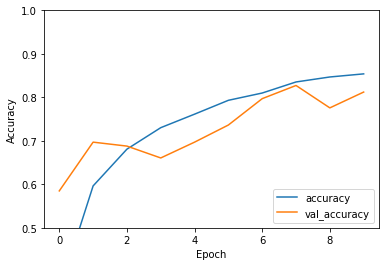

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_ds, verbose=2)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import numpy

plt.figure(figsize=(30,30))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)
  
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)